# Weak/Failing kidneys - Logistic Regression

In [1]:
import some_load_train_evaluate_functions as ml

In [2]:
path = '../KG/db.env'

driver = ml.connect_to_neo4j(path)

Connected to database successfully.


### Load Data

In [3]:
# Weak/Failing kidneys data

weak_kidney_df = ml.get_data_of_disease(driver, 'Weak/Failing kidneys')
weak_kidney_df

,Respondent_ID,Gender,Age,BMI,25-hydroxyvitamin D2 + D3 [nmol/L],A/G Ratio,Alpha-carotene [umol/L],Alpha-crypotoxanthin [umol/L],Alpha-tocopherol [umol/L],Basophils [%],...,Ferritin [ng/mL],Gamma Glutamyl Transferase [IU/L],Hemoglobin [g/dL],Insulin [pmol/L],LDL-Cholesterol(NIH2) [mmol/L],Lactate Dehydrogenase [IU/L],Transferrin Saturation [%],Transferrin receptor [nmol/L],Triglyceride [mmol/L],Weak/Failing kidneys
0,93705,0,66,31.7,89.9,1.517241,0.138,0.071,26.006,1.0,...,28.70,21.0,11.9,NaN,NaN,174.0,28.0,39.8,NaN,0
1,93708,0,66,23.7,116.0,1.218750,0.192,0.127,NaN,0.7,...,109.00,22.0,13.2,58.32,2.870,247.0,32.0,30.1,0.655,0
2,93709,0,75,38.9,72.8,1.121212,0.009,0.017,28.561,0.6,...,129.00,31.0,15.4,NaN,NaN,NaN,21.0,46.5,NaN,0
3,93711,1,56,21.3,165.0,1.290323,0.173,0.079,31.115,0.4,...,40.60,19.0,14.7,31.68,4.086,139.0,16.0,34.8,0.542,0
4,93713,1,67,23.5,63.5,2.047619,0.028,0.028,18.344,0.6,...,238.00,26.0,14.2,NaN,NaN,123.0,27.0,28.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5555,102950,1,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5556,102952,0,70,20.0,82.7,1.846154,0.235,0.077,31.347,0.6,...,135.00,18.0,13.4,26.34,1.112,168.0,39.0,29.1,0.881,0
5557,102953,1,42,35.8,49.5,1.142857,0.106,0.080,21.873,0.6,...,120.00,28.0,15.5,NaN,NaN,136.0,20.0,28.6,NaN,0
5558,102954,0,41,26.1,50.5,1.500000,0.117,0.056,26.935,1.4,...,1.99,8.0,6.4,56.94,2.793,123.0,5.0,248.0,0.553,0


### Training

In [4]:
log_reg = ml.LogisticRegression()

# Attributes and Labels

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

# Training

log_reg.fit(X_train, y_train)

# Accuracy scores

y_pred = log_reg.predict(X_val)

print('Training Accuracy: ',ml.accuracy_score(y_train, log_reg.predict(X_train)))

print('Testing Accuracy: ',ml.accuracy_score(y_val, y_pred))

Training Accuracy:  0.9642535971223022
Testing Accuracy:  0.9685251798561151


## Feature Selection

### Correlation Analysis

In [5]:
log_reg_test = ml.LogisticRegression()

In [8]:
pos_corr, neg_corr = ml.get_correlated_features(weak_kidney_df,'Weak/Failing kidneys',pos=0.0,neg=-0.0)

corr_features = list(pos_corr.keys()[1:]) + list(neg_corr.keys())
corr_features[:30]

['Creatinine [mg/dL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Retinol [umol/L]',
 'Osmolality [mmol/Kg]',
 'Age',
 'Ferritin [ng/mL]',
 'Uric Acid [mg/dL]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Chromium [nmol/L]',
 'Insulin [pmol/L]',
 'Potassium [mmol/L]',
 'Red cell distribution width [%]',
 'Neutrophil_Lymphocyte Ratio',
 'Lactate Dehydrogenase [IU/L]',
 'Blood lead [umol/L]',
 'C-Reactive Protein [mg/L]',
 'Glycohemoglobin [%]',
 'Fasting Glucose [mmol/L]',
 'Alkaline Phosphatase [IU/L]',
 'Monocyte [%]',
 'Segmented neutrophils [%]',
 'BMI',
 'Platelet_Lymphocyte Ratio',
 'Eosinophils [%]',
 'Globulin [g/dL]',
 'Mean cell volume [fL]',
 'Transferrin receptor [nmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Basophils [%]',
 'Gamma Glutamyl Transferase [IU/L]']

In [9]:
ml.evaluate_feature_set(corr_features[:30], log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.966

Precision: 0.870

Recall: 0.217

F1-Score: 0.348


### SelectFromModel

In [10]:
sfm_features = ml.select_from_model_features(log_reg_test,X,y)
sfm_features

['Gender',
 'Age',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'A/G Ratio',
 'Beta-cryptoxanthin [umol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'Creatinine [mg/dL]',
 'Glycohemoglobin [%]',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'LDL_HDL Ratio',
 'Lutein and zeaxanthin [umol/L]',
 'Lymphocyte_Monocyte Ratio',
 'Neutrophil_Lymphocyte Ratio',
 'Osmolality [mmol/Kg]',
 'Phosphorus [mg/dL]',
 'Platelet count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'Platelet_WBC Ratio',
 'RBC count [million cells/uL]',
 'Retinol [umol/L]',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Cholestrol_HDL Ratio',
 'Total Lycopene [umol/L]',
 'Triglyceride_HDL Ratio',
 'Alanine Aminotransferase [U/L]',
 'Creatine Phosphokinase [IU/L]',
 'Direct HDL-Cholesterol [mmol/L]',
 'Transferrin Saturation [%]',
 'Triglyceride [mmol/L]']

In [11]:
sfm_features = list(sfm_features)

ml.evaluate_feature_set(sfm_features, log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.963

Test Accuracy: 0.966

Precision: 0.870

Recall: 0.217

F1-Score: 0.348


### SelectKBest

In [12]:
k_best_features = ml.select_k_best(X, y, n=30)
k_best_features[:30]

['Creatinine [mg/dL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Retinol [umol/L]',
 'Age',
 'Osmolality [mmol/Kg]',
 'Ferritin [ng/mL]',
 'RBC count [million cells/uL]',
 'Uric Acid [mg/dL]',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Hematocrit [%]',
 'Hemoglobin [g/dL]',
 'Albumin [g/dL]',
 'Lymphocyte [%]',
 'Potassium [mmol/L]',
 'Chromium [nmol/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Red cell distribution width [%]',
 'Neutrophil_Lymphocyte Ratio',
 'Lactate Dehydrogenase [IU/L]',
 'Blood lead [umol/L]',
 'C-Reactive Protein [mg/L]',
 'A/G Ratio',
 'Glycohemoglobin [%]',
 'Total Lycopene [umol/L]',
 'Alkaline Phosphatase [IU/L]',
 'Trans-lycopene [umol/L]',
 'Lymphocyte_Monocyte Ratio',
 'Insulin [pmol/L]',
 'Alpha-crypotoxanthin [umol/L]',
 'Monocyte [%]']

In [13]:
ml.evaluate_feature_set(k_best_features[:30], log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.963

Test Accuracy: 0.966

Precision: 0.864

Recall: 0.207

F1-Score: 0.333


### Recursive Feature Elimination (RFE) 

In [14]:
rfe_features = ml.select_rfe_features(log_reg_test,X,y,n=30,step=0.5)
rfe_features[:30]

['Gender',
 'Iron [ug/dL]',
 'Iron frozen [umol/L]',
 'LDL_HDL Ratio',
 'Lutein and zeaxanthin [umol/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Non_HDL Ratio',
 'Osmolality [mmol/Kg]',
 'Platelet count [1000 cells/uL]',
 'Platelet_Lymphocyte Ratio',
 'Glycohemoglobin [%]',
 'Platelet_WBC Ratio',
 'Sodium [mmol/L]',
 'Systemic Immune‐inflammation Index (SII)',
 'Total Cholestrol_HDL Ratio',
 'Total Lycopene [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Creatine Phosphokinase [IU/L]',
 'Gamma Glutamyl Transferase [IU/L]',
 'Hemoglobin [g/dL]',
 'Transferrin Saturation [%]',
 'RBC count [million cells/uL]',
 'Globulin [g/dL]',
 'Phosphorus [mg/dL]',
 'Age',
 'Beta-cryptoxanthin [umol/L]',
 'Creatinine [mg/dL]',
 'BMI',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'A/G Ratio']

In [15]:
ml.evaluate_feature_set(rfe_features[:30], log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.964

Test Accuracy: 0.968

Precision: 0.917

Recall: 0.239

F1-Score: 0.379


### Lasso Regularization

In [16]:
l1_selected_features = ml.log_reg_lasso_select(X_train, y_train)
l1_selected_features[:30]

['Gender',
 'Creatinine [mg/dL]',
 'Age',
 'LDL_HDL Ratio',
 'Retinol [umol/L]',
 'Platelet_Lymphocyte Ratio',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Beta-cryptoxanthin [umol/L]',
 'Aspartate Aminotransferase [U/L]',
 'Ferritin [ng/mL]',
 'Phosphorus [mg/dL]',
 'Vitamin C [umol/L]',
 'Alanine Aminotransferase [U/L]',
 'Alkaline Phosphatase [IU/L]',
 'Lutein and zeaxanthin [umol/L]',
 'Total Bilirubin [mg/dL]',
 'Bicarbonate [mmol/L]',
 'Alpha-tocopherol [umol/L]',
 'Blood lead [umol/L]',
 'Total Lycopene [umol/L]',
 'Blood Urea Nitrogen [mg/dL]',
 'A/G Ratio',
 'Blood selenium [umol/L]',
 'Uric Acid [mg/dL]',
 'Transferrin receptor [nmol/L]',
 'Platelet_WBC Ratio',
 'White blood cell count [1000 cells/uL]',
 'Iron frozen [umol/L]',
 'Iron [ug/dL]',
 'Nucleated RBCs']

In [17]:
ml.evaluate_feature_set(l1_selected_features[:30], log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.964

Test Accuracy: 0.968

Precision: 0.889

Recall: 0.261

F1-Score: 0.403


### Relief F

In [18]:
relieff_features = ml.relief_feature_select(30,X,y)

In [19]:
relieff_features[:30]

['Nucleated RBCs',
 'Creatinine [mg/dL]',
 'Blood Urea Nitrogen [mg/dL]',
 'Age',
 'Hemoglobin [g/dL]',
 'Hematocrit [%]',
 'Osmolality [mmol/Kg]',
 'Retinol [umol/L]',
 'Total Cholesterol [mmol/L]',
 'RBC count [million cells/uL]',
 'Uric Acid [mg/dL]',
 'Non_HDL Ratio',
 '25-hydroxyvitamin D2 + D3 [nmol/L]',
 'Neutrophil_Lymphocyte Ratio',
 'Lymphocyte [%]',
 'Albumin [g/dL]',
 'Gender',
 'Transferrin Saturation [%]',
 'Chloride [mmol/L]',
 'UIBC [umol/L]',
 'Glycohemoglobin [%]',
 'Red cell distribution width [%]',
 'Globulin [g/dL]',
 'Total Protein [g/dL]',
 'A/G Ratio',
 'Segmented neutrophils [%]',
 'Total Lycopene [umol/L]',
 'Alpha-tocopherol [umol/L]',
 'Total Iron Binding Capacity [umol/L]',
 'Iron frozen [umol/L]']

In [20]:
ml.evaluate_feature_set(relieff_features[:30], log_reg_test, X_train, y_train, X_val, y_val)


Train Accuracy: 0.962

Test Accuracy: 0.965

Precision: 0.889

Recall: 0.174

F1-Score: 0.291


### Optimal no. of features

In [21]:
final_features = list(l1_selected_features) 

Finding optimal no. of features..: 100%|████████| 85/85 [00:22<00:00,  3.83it/s]


Maximum accuracy = 0.9649 for 5 features


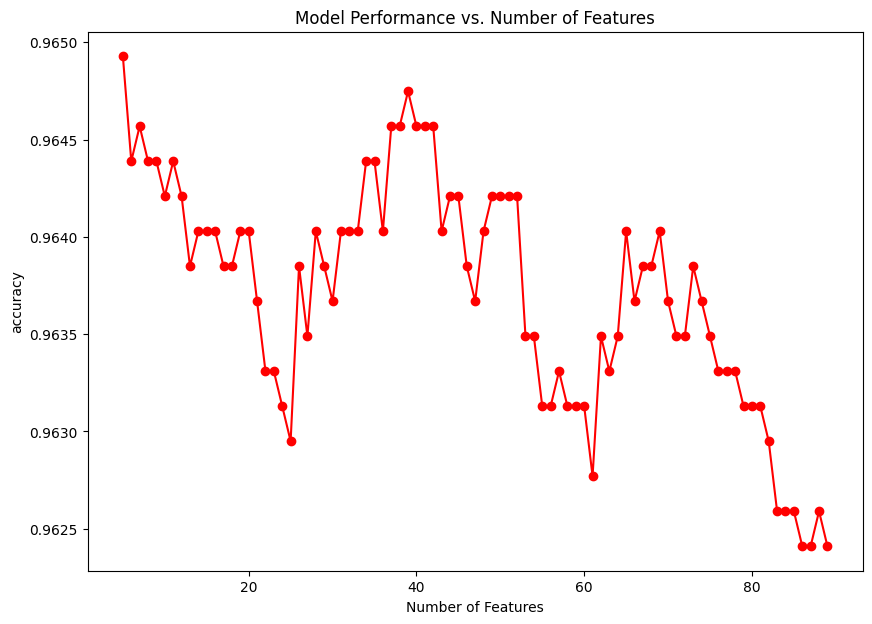

In [22]:
# Optimal no. of features

ml.plot_num_feature_performance(log_reg_test,  X, y, final_features, scoring='accuracy')

Finding optimal no. of features..: 100%|████████| 85/85 [00:27<00:00,  3.14it/s]


Maximum f1 = 0.3127 for 39 features


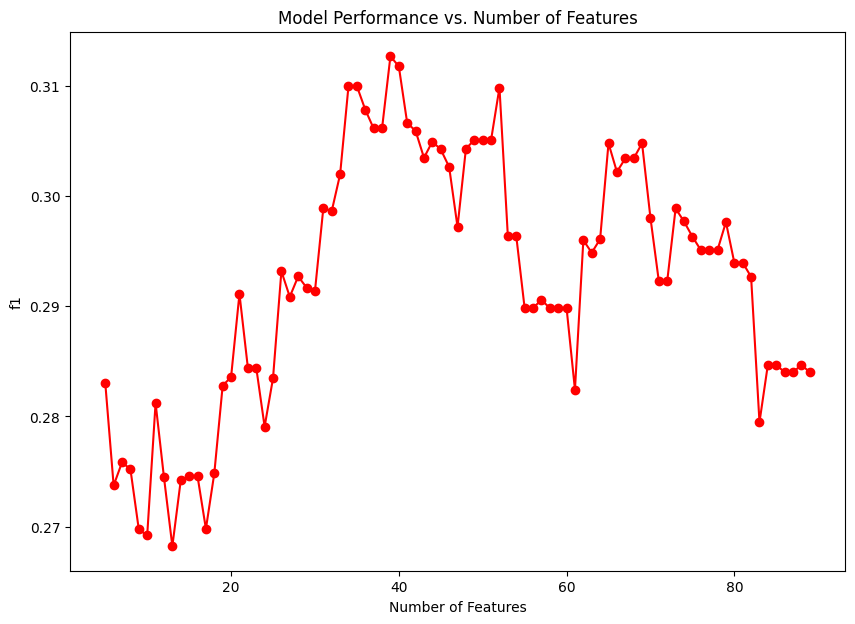

In [23]:
# Optimal no. of features

ml.plot_num_feature_performance(log_reg_test,  X, y, final_features, scoring='f1')

Finding optimal no. of features..: 100%|████████| 85/85 [00:22<00:00,  3.75it/s]


Maximum recall = 0.2020 for 52 features


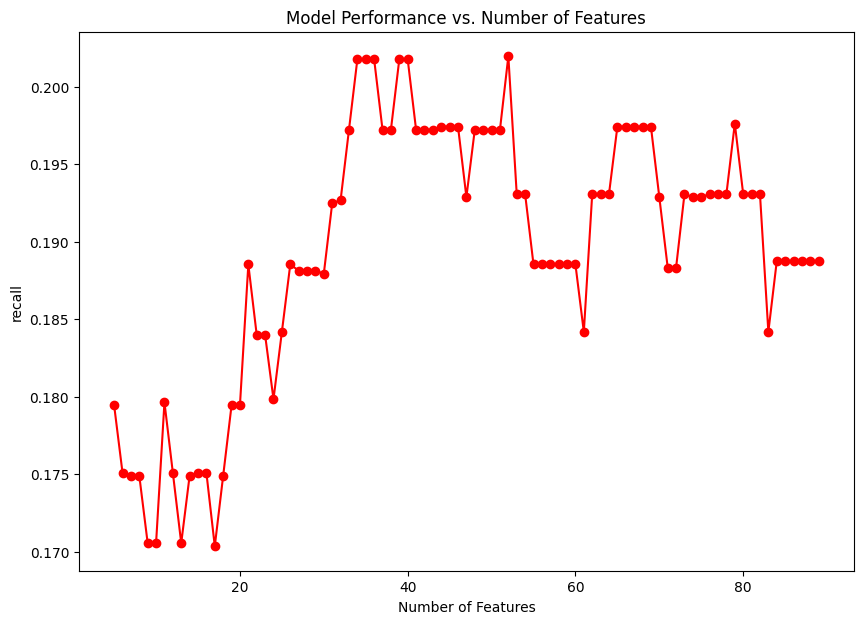

In [24]:
# Optimal no. of features

ml.plot_num_feature_performance(log_reg_test,  X, y, final_features, scoring='recall')

In [25]:
num_features = 39

selected = final_features[:num_features]
selected.append('Weak/Failing kidneys')

weak_kidney_df = weak_kidney_df[selected]

In [26]:
# Save feature set

feature_dir = "../Models/Weak kidneys/Feature Sets"
if not ml.os.path.exists(feature_dir):
    ml.os.makedirs(feature_dir)

with open('../Models/Weak kidneys/Feature Sets/Logistic Regression Features.pkl', 'wb') as f:
    ml.pickle.dump(selected, f)

## Preprocessing

### Zero Imputation

In [27]:
# Imputing null values with zeroes

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                        impute = True, scale=True,
                                                        imputer=ml.SimpleImputer(strategy='constant',fill_value=0),
                                                        random_state=42)

In [28]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.965

Test Accuracy: 0.969

Precision: 0.926

Recall: 0.272

F1-Score: 0.420


### Mode Imputation

In [29]:
# Imputing with most frequent values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='most_frequent'),
                                                              random_state=42)

In [30]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.964

Test Accuracy: 0.968

Precision: 0.839

Recall: 0.283

F1-Score: 0.423


### k-NN Imputation

In [31]:
# Imputing missing values with values from the k-nearest neighbors in the feature space

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.KNNImputer(n_neighbors=20),
                                                              random_state=42)

In [32]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.964

Test Accuracy: 0.967

Precision: 0.800

Recall: 0.261

F1-Score: 0.393


### Multiple Imputation by Chained Equations (MICE)

In [33]:
# Imputes by looking at data from other columns and trying to estimate the best prediction for each missing value.

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.IterativeImputer(max_iter=20),
                                                              random_state=42)

In [34]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.964

Test Accuracy: 0.967

Precision: 0.800

Recall: 0.261

F1-Score: 0.393


### Median Imputation

In [35]:
# Imputing with median values

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='median'),
                                                              random_state=42)

In [36]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.964

Test Accuracy: 0.968

Precision: 0.833

Recall: 0.272

F1-Score: 0.410


### Mean Imputation

In [37]:
# Splitting and Preprocessing data

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df, label = 'Weak/Failing kidneys',
                                                              impute = True, scale=True,
                                                              imputer=ml.SimpleImputer(strategy='mean'),
                                                              random_state=42)

In [38]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.964

Test Accuracy: 0.968

Precision: 0.833

Recall: 0.272

F1-Score: 0.410


### Dropping Null Values

In [40]:
# Drop null values
weak_kidney_df_na = weak_kidney_df.dropna()

X, y, X_train, X_val, X_test, y_train, y_val, y_test = ml.preprocess_and_split(df = weak_kidney_df_na, label = 'Weak/Failing kidneys',
                                                              impute = False, scale=True,
                                                              random_state=42)

In [41]:
log_reg.fit(X_train, y_train)

ml.evaluate_model_metrics(log_reg,X_train,y_train,X_val,y_val)


Train Accuracy: 0.959

Test Accuracy: 0.966

Precision: 0.800

Recall: 0.333

F1-Score: 0.471


## Oversampling and Undersampling

### Random Oversampling

In [42]:
X_ros, y_ros = ml.random_over_sample(X_train, y_train)

log_reg.fit(X_ros, y_ros)

ml.evaluate_model_metrics(log_reg,X_ros, y_ros,X_val, y_val)


Train Accuracy: 0.913

Test Accuracy: 0.898

Precision: 0.296

Recall: 0.875

F1-Score: 0.442


### SMOTE (Synthetic Minority Over-sampling Technique)

In [43]:
X_smote, y_smote = ml.smote_over_sample(X_train, y_train)

log_reg.fit(X_smote, y_smote)

ml.evaluate_model_metrics(log_reg,X_smote, y_smote,X_val, y_val)


Train Accuracy: 0.905

Test Accuracy: 0.906

Precision: 0.308

Recall: 0.833

F1-Score: 0.449


### Random Undersampling

In [44]:
X_rus, y_rus = ml.random_under_sample(X_train, y_train)

log_reg.fit(X_rus, y_rus)

ml.evaluate_model_metrics(log_reg,X_rus, y_rus,X_val, y_val)


Train Accuracy: 0.868

Test Accuracy: 0.780

Precision: 0.158

Recall: 0.875

F1-Score: 0.268


### Tomek Links

In [45]:
X_tomek, y_tomek = ml.tomek_links(X_train, y_train)

log_reg.fit(X_tomek, y_tomek)

ml.evaluate_model_metrics(log_reg,X_tomek, y_tomek,X_val, y_val)


Train Accuracy: 0.961

Test Accuracy: 0.966

Precision: 0.800

Recall: 0.333

F1-Score: 0.471


### SMOTE + Tomek Links

In [46]:
X_smote_tomek, y_smote_tomek = ml.smote_tomek(X_train, y_train)

log_reg.fit(X_smote_tomek, y_smote_tomek)

ml.evaluate_model_metrics(log_reg,X_smote_tomek, y_smote_tomek,X_val, y_val)


Train Accuracy: 0.905

Test Accuracy: 0.906

Precision: 0.308

Recall: 0.833

F1-Score: 0.449


In [47]:
# tomek provides better results

X_train, y_train = X_tomek, y_tomek

## Hyperparameter Optimization 

### Grid Search

In [48]:
# Hyperparameters
param_grid = {
    
    'penalty': ['l1', 'l2','None'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['newton-cg','saga','lbfgs'],
    'max_iter': [100,200,300],
    'class_weight': [None, 'balanced'],
    'warm_start': [False, True],
    
}

In [49]:
grid_best_params, log_reg_grid = ml.grid_search_optimize(log_reg, param_grid, X_train, 
                                                                y_train, cv=10,scoring='f1')

In [50]:
grid_best_params

{'C': 0.1,
 'class_weight': 'balanced',
 'max_iter': 300,
 'penalty': 'l1',
 'solver': 'saga',
 'warm_start': False}

In [51]:
ml.evaluate_model_metrics(log_reg_grid,X_train,y_train,X_val,y_val)


Train Accuracy: 0.886

Test Accuracy: 0.908

Precision: 0.312

Recall: 0.833

F1-Score: 0.455


### Random Search

In [52]:
rand_best_params, log_reg_rand = ml.random_search_optimize(log_reg,param_grid,n_iter=100,cv=5,
                                                               X_train=X_train, y_train=y_train,
                                                               scoring='accuracy')

In [53]:
rand_best_params

{'warm_start': True,
 'solver': 'saga',
 'penalty': 'l1',
 'max_iter': 300,
 'class_weight': None,
 'C': 0.1}

In [54]:
ml.evaluate_model_metrics(log_reg_rand,X_train,y_train,X_val,y_val)


Train Accuracy: 0.957

Test Accuracy: 0.964

Precision: 0.778

Recall: 0.292

F1-Score: 0.424


### Optuna

In [55]:
def objective(trial):
    
    # Hyperparameter search space
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    solver = trial.suggest_categorical('solver', ['newton-cg', 'saga', 'lbfgs',
                                                  'liblinear','sag'])
    if (penalty == "l1" and solver not in ["liblinear", "saga"]) or (penalty == "elasticnet" and solver not in ["saga"]) or penalty=='none' and solver in ['liblinear']:
        return 0
    max_iter = trial.suggest_int('max_iter', 100, 300, 500)
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    warm_start = trial.suggest_categorical('warm_start', [False, True])
    fit_intercept = trial.suggest_categorical('fit_intercept', [False, True])

    model = ml.LogisticRegression(
        penalty=penalty, C=C, solver=solver, max_iter=max_iter,
        class_weight=class_weight, warm_start=warm_start, fit_intercept=fit_intercept
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    f1 = ml.f1_score(y_test, y_pred)

    return f1

In [56]:
best_trial , log_reg_opt = ml.optuna_optimize(objective, ml.LogisticRegression, n_trials=150)

In [57]:
best_trial

{'penalty': 'l1',
 'C': 0.0030422596571012383,
 'solver': 'saga',
 'max_iter': 100,
 'class_weight': 'balanced',
 'warm_start': False,
 'fit_intercept': True}

In [58]:
log_reg_opt.fit(X_train,y_train)

ml.evaluate_model_metrics(log_reg_opt,X_train,y_train,X_val,y_val)


Train Accuracy: 0.951

Test Accuracy: 0.946

Precision: 0.423

Recall: 0.458

F1-Score: 0.440


## Evaluation on Test Set


Train Accuracy: 0.894

Test Accuracy: 0.877

Precision: 0.294

Recall: 0.862

F1-Score: 0.439

Confusion Matrix:

[[433  60]
 [  4  25]]


Classification Report:

              precision    recall  f1-score   support

     Class 0       0.99      0.88      0.93       493
     Class 1       0.29      0.86      0.44        29

    accuracy                           0.88       522
   macro avg       0.64      0.87      0.68       522
weighted avg       0.95      0.88      0.90       522


ROC-AUC Curve:


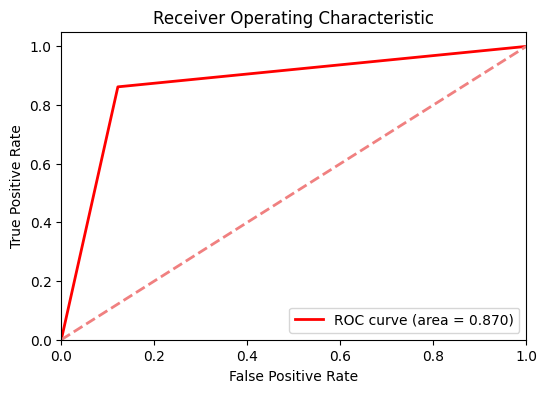

In [59]:
# After evaluating on the validation set, we evaluate and finalize on the test set

ml.evaluate_model_metrics(log_reg, X_train, y_train, X_test, y_test, verbose=6)

## Cross Validation

### K-fold

In [60]:
ml.k_cross_validate(log_reg,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.96183206 0.92366412 0.95419847 0.93129771 0.96946565 0.94615385
 0.94615385 0.96923077 0.94615385 0.96153846]

Mean accuracy score:  0.9509688784497945

Standard deviation:  0.014552802042480571


In [61]:
ml.k_cross_validate(log_reg_grid,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.87022901 0.82442748 0.85496183 0.87022901 0.80152672 0.84615385
 0.9        0.89230769 0.88461538 0.87692308]

Mean accuracy score:  0.8621374045801528

Standard deviation:  0.029327977890779705


In [62]:
ml.k_cross_validate(log_reg_rand,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.96183206 0.9389313  0.9389313  0.96183206 0.95419847 0.94615385
 0.93846154 0.96923077 0.94615385 0.96153846]

Mean accuracy score:  0.9517263652378156

Standard deviation:  0.01085602119089895


In [63]:
ml.k_cross_validate(log_reg_opt,X,y,cv=10,scoring='accuracy')


accuracy scores: [0.83969466 0.83969466 0.92366412 0.92366412 0.91603053 0.93076923
 0.9        0.90769231 0.91538462 0.83846154]

Mean accuracy score:  0.8935055783910746

Standard deviation:  0.03641186479046507


### Stratified K-fold

In [64]:
ml.stratified_k_cross_validate(log_reg,X,y,n_splits=10)


Average Accuracy: 0.9486611861421022

Average Precision: 0.5666666666666667

Average Recall: 0.24285714285714283

Average F1-Score: 0.3255050505050505


In [65]:
ml.stratified_k_cross_validate(log_reg_grid,X,y,n_splits=10)


Average Accuracy: 0.8566588373458602

Average Precision: 0.23078459945851248

Average Recall: 0.6857142857142857

Average F1-Score: 0.3420003506311361


In [66]:
ml.stratified_k_cross_validate(log_reg_rand,X,y,n_splits=10)


Average Accuracy: 0.9524897240164416

Average Precision: 0.5583333333333333

Average Recall: 0.19999999999999998

Average F1-Score: 0.2847979797979798


In [67]:
ml.stratified_k_cross_validate(log_reg_opt,X,y,n_splits=10)


Average Accuracy: 0.8912037580739872

Average Precision: 0.27229601624725464

Average Recall: 0.5714285714285714

Average F1-Score: 0.364261736653041


### Save Model

In [68]:
final_log_reg_estimator = log_reg

In [69]:
# Saving the model

ml.save_model(final_log_reg_estimator, "../Models/Weak kidneys/Logistic_Regression.pkl")

Saved Model


## Prediction

In [199]:
# Predicting on perturbed values
sc = ml.np.random.rand()

ml.predict_on_modified_instance(final_log_reg_estimator, X_test.iloc[0], y_test.iloc[0], sc)

Instance:
 [ 0.         -0.50074717 -1.58993843  0.09844599  0.27523943  0.48409339
 -0.95148708 -0.21148079 -0.96786329 -0.76865347 -0.94201289 -1.18001348
 -1.03154332 -0.99778592 -0.46350449 -0.77159631  0.00677171 -0.7987746
 -0.16436267  1.12177411 -1.20721666 -0.25639701 -1.17814819 -1.19671749
 -0.31902124 -0.13873391 -0.29293582 -0.12530721 -0.01238296 -1.09769077
 -0.19938336 -0.28552678 -1.3652042   0.41670787  0.29725817 -0.34773776
 -0.30844109 -0.29372788  0.72278572]

Expected Class:  0

 Modified Instance:
 [ 0.         -0.75278415 -1.56249581 -0.1206565   0.29039143  0.41036823
 -0.89880797 -0.06046177 -0.75852363 -0.91118708 -0.66049754 -1.23600484
 -0.79153277 -0.71610552 -0.35340876 -0.78764623  0.15656181 -0.91220055
 -0.28587378  1.29117948 -1.36628578 -0.27881866 -1.36414148 -1.55650027
 -0.19829381 -0.11856153 -0.3966414   0.01163043 -0.04146979 -0.97293913
 -0.23444615 -0.44714135 -1.50164749  0.48767922  0.28576322 -0.43883753
 -0.50130503 -0.15023278  0.711302

In [200]:
ml.predict_on_modified_instance(final_log_reg_estimator, X_test.iloc[28], y_test.iloc[28], sc)

Instance:
 [ 0.          0.28796657  0.38112882 -1.62021762  1.0540063  -1.11817539
  0.0722913  -0.622449    0.3592574  -0.62378655  0.74746089  1.33123808
 -0.18174106  0.38728881 -0.64691607 -0.00659484 -0.82495302 -0.80961529
  1.03770126 -1.39222298  0.56167344  0.367199   -0.48701499  0.05562164
 -0.38048591 -1.21685913  2.18884447 -0.35296293 -0.36257186  0.13455564
 -1.66117936  0.49892048 -0.5604611  -0.02364537 -0.11535276 -1.19332367
  0.36902615 -0.120811    0.72278572]

Expected Class:  1

 Modified Instance:
 [ 0.          0.46382789  0.2531155  -1.68375835  1.24635428 -1.13673367
 -0.04557265 -0.66072832  0.34277531 -0.65049017  0.87927953  1.73798454
 -0.10993337  0.2845336  -0.72735243  0.18838712 -1.07973164 -0.89882323
  0.97302862 -1.73760418  0.5830683   0.19805042 -0.40393825 -0.13084415
 -0.39524504 -1.10147133  2.1513612  -0.27809448 -0.22889204  0.30830741
 -1.51196612  0.33697789 -0.56529391  0.25325779  0.05713923 -0.76164196
  0.42416273 -0.26903242  0.37886

In [201]:
ml.predict_on_modified_instance(final_log_reg_estimator, X_test.iloc[97], y_test.iloc[97], sc)

Instance:
 [ 0.          2.84271325  1.66660746 -0.7824057   0.6537835  -0.23538547
  2.23131964 -0.56099581 -0.55951847 -0.2400163   0.55974158  0.91210913
 -1.03154332 -1.33469598 -0.30956978  0.37590589 -0.40909066 -0.71195569
  0.88744327 -1.35745494  2.33056353 -0.35697702 -0.02625953  2.29664954
 -0.16299552 -0.8348748   0.83910431 -0.74322988 -0.56684871  0.13455564
 -1.00072936  0.23743806  0.30280877  0.39769523  0.50424004 -0.62959973
 -0.04669238 -0.27699399  0.42825477]

Expected Class:  1

 Modified Instance:
 [ 0.          2.97781861  1.51130181 -0.64804922  0.73963401 -0.08488583
  2.10159051 -0.47288847 -0.62701219 -0.02555819  0.74042067  1.09915869
 -1.18270081 -1.56635337 -0.51246781  0.19084938 -0.40445087 -0.6911493
  1.02024093 -1.25531237  2.42862668 -0.43700826  0.13901257  2.48825545
  0.03861589 -0.92168231  0.9957559  -0.67103692 -0.56747712  0.23184871
 -0.98820986  0.33103317  0.39584931  0.41576268  0.42792738 -0.58659572
  0.09043769 -0.10659955  0.358569